In [1]:
import arcpy
import numpy as np
import matplotlib.pyplot as plt

# Multidimensional raster as inputs for raster functions
Support input multdimensional raster(s) as the inputs of some raster functions, and output a multidimensional raster

### Example: HeatIndex workflow for mdim raster
> ![](img/heat_index.png)

-----

### 1. Load Grib file as Multidimensional Raster


- ftp://tgftp.nws.noaa.gov/SL.us008001/ST.opnl/DF.gr2/DC.ndgd/GT.mosgfs/AR.conus


In [5]:
# load the grib file as a multidimensional raster
temp = arcpy.Raster(r"C:\Users\greg6750\Documents\IPython Notebooks\developing-with-imagery\Week 5\ds.temp.bin", True) 
# check its variables 
temp.variables

['T@HTGL(StdTime=23)']

In [11]:
temp.getDimensionValues("T@HTGL", "StdTime")

['2019-09-18T06:00:00+00:00',
 '2019-09-18T09:00:00+00:00',
 '2019-09-18T12:00:00+00:00',
 '2019-09-18T15:00:00+00:00',
 '2019-09-18T18:00:00+00:00',
 '2019-09-18T21:00:00+00:00',
 '2019-09-19T00:00:00+00:00',
 '2019-09-19T03:00:00+00:00',
 '2019-09-19T06:00:00+00:00',
 '2019-09-19T09:00:00+00:00',
 '2019-09-19T12:00:00+00:00',
 '2019-09-19T15:00:00+00:00',
 '2019-09-19T18:00:00+00:00',
 '2019-09-19T21:00:00+00:00',
 '2019-09-20T00:00:00+00:00',
 '2019-09-20T03:00:00+00:00',
 '2019-09-20T06:00:00+00:00',
 '2019-09-20T09:00:00+00:00',
 '2019-09-20T12:00:00+00:00',
 '2019-09-20T15:00:00+00:00',
 '2019-09-20T18:00:00+00:00',
 '2019-09-20T21:00:00+00:00',
 '2019-09-21T00:00:00+00:00']

In [4]:
# load the grib file as a mdim raster
rh = arcpy.Raster(r"C:\Users\greg6750\Documents\IPython Notebooks\developing-with-imagery\Week 5\ds.rhm.bin", True) 
# check its variables 
rh.variables

['RH@HTGL(StdTime=23)']

In [7]:
# check the dimensional values of a given variable and a dimension
rh.getDimensionValues("RH@HTGL", "StdTime")

['2019-09-18T06:00:00+00:00',
 '2019-09-18T09:00:00+00:00',
 '2019-09-18T12:00:00+00:00',
 '2019-09-18T15:00:00+00:00',
 '2019-09-18T18:00:00+00:00',
 '2019-09-18T21:00:00+00:00',
 '2019-09-19T00:00:00+00:00',
 '2019-09-19T03:00:00+00:00',
 '2019-09-19T06:00:00+00:00',
 '2019-09-19T09:00:00+00:00',
 '2019-09-19T12:00:00+00:00',
 '2019-09-19T15:00:00+00:00',
 '2019-09-19T18:00:00+00:00',
 '2019-09-19T21:00:00+00:00',
 '2019-09-20T00:00:00+00:00',
 '2019-09-20T03:00:00+00:00',
 '2019-09-20T06:00:00+00:00',
 '2019-09-20T09:00:00+00:00',
 '2019-09-20T12:00:00+00:00',
 '2019-09-20T15:00:00+00:00',
 '2019-09-20T18:00:00+00:00',
 '2019-09-20T21:00:00+00:00',
 '2019-09-21T00:00:00+00:00']

### 2. Apply HeatIndex Function

In [8]:
# Apply heatindex function to the 2 multidimensional raster objects. The output we got is also a multidimensional raster
# Each slice in the output show the heat index at a certain time point
heat_index_raster = arcpy.ia.HeatIndex(temp,  rh, temperature_unit='Kelvin', heat_index_unit='Fahrenheit')
heat_index_raster.mdinfo

AttributeError: module 'arcpy.ia' has no attribute 'HeatIndex'

### 3. Visualize

#### 3.1. Select a single slice

In [12]:
# select oneslice for visualization 
single_slice = arcpy.ia.Subset(temp, dimension_definitions = {"StdTime": '2019-09-18T06:00:00+00:00'})
single_slice.variables

['T@HTGL(StdTime=1)']

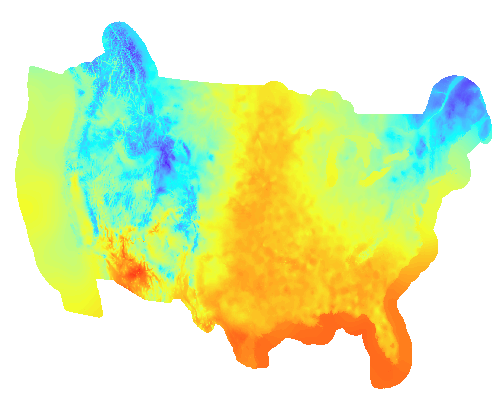

In [14]:
single_slice

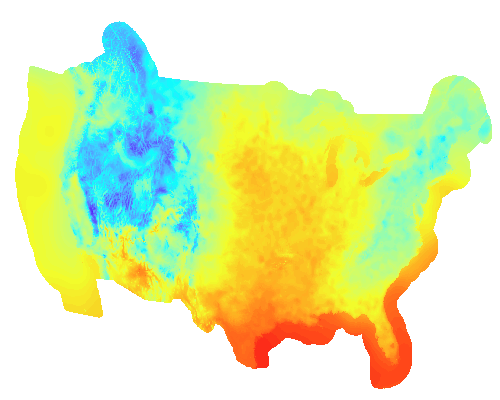

In [17]:
# select oneslice for visualization 
single_slice = arcpy.ia.Subset(temp, dimension_definitions = {"StdTime": '2019-09-20T12:00:00+00:00'})
single_slice

#### 3.2 Plot

In [13]:
rendered_raster = arcpy.ia.Render(single_slice, rendering_rule = {"min": 15, "max":95}, 
                                  colormap = "Temps"
)
rendered_raster

AttributeError: module 'arcpy.ia' has no attribute 'Render'

### 4. Persist

In [9]:
heat_index_raster.save(r"C:\tmp\heat_index_outputs.crf")